# Demo I for the Mathematics with Industry course.

Full demo includes the following examples:
    
    1) A beam propagation method via an external library "diffractio"
    2) Simple Gaussian beam model without attenuation and lens effects
    3) An inversion example based on a simple Gaussian model


## I. Beam propagation with "diffractio"

A simple example with two lenses and a source that you can move by changing src_x and src_z.

The modeling space is made small on purpuse to make sure that there are no sampling issues.

In [18]:
# Imports: 
import numpy as np
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

# Import units:
from diffractio import (degrees, eps, mm, no_date, np, num_max_processors, plt,
                        sp, um)

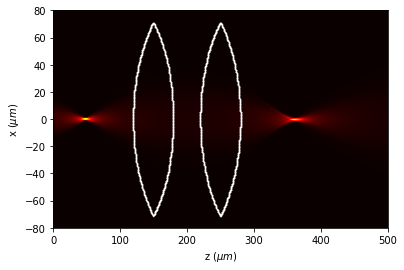

In [37]:
# Define a routine for modeling two lenses and one light source.
def model_lenses(src_x, src_z, lens_dist = 100, F = 100):
    
    # define the space:
    x0 = np.linspace(-80 * um, 80 * um, 512)
    z0 = np.linspace(0 * um, 500 * um, 512)
    wavelength = 1 * um

    # Add source:    
    
    u0 = Scalar_source_X(x=x0, wavelength=wavelength)
    u0.gauss_beam(A = 1, x0 = src_x * um, z0 = -src_z * um, w0 = 1 * um, theta = 0. * degrees)
    #u0.plane_wave(A=1, theta=0 * degrees)

    # Add lenses:    
    u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
    u1.incident_field(u0)
    u1.lens_convergent(
        r0=(0, 120*um),
        aperture=200 * um,
        radius=(F * um, -F * um),
        thickness=60 * um,
        refraction_index=1.5,
        angle=0 * degrees,
        mask=(10 * um, 3 + 0.05j))

    u1.lens_convergent(
        r0=(0, (120+lens_dist)*um),
        aperture=200 * um,
        radius=(F * um, -F * um),
        thickness=60 * um,
        refraction_index=1.5,
        angle=0 * degrees,
        mask=(10 * um, 3 + 0.05j))

    # Draw lenses:
    edges = u1.surface_detection()
    u1.filter_refraction_index(
        type_filter=2, pixels_filtering=10, max_diff_filter=0.05, draw_check=False);

    # Molde and draw:       
    u1.BPM(verbose=False)
    u1.draw(logarithm=True, normalize='maximum', draw_borders=True, edge_matrix=edges);

# Test I (positions are in micrometres):
model_lenses(src_x = 0, src_z = 50, lens_dist = 100, F = 100)

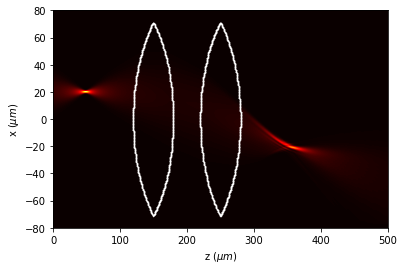

In [38]:
# Test II (source offset):
model_lenses(src_x = 20, src_z = 50, lens_dist = 100, F = 100)

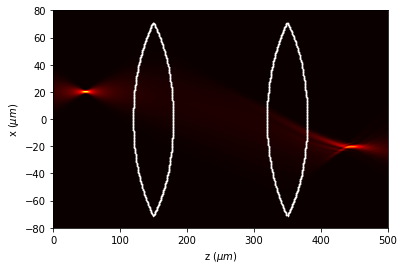

In [39]:
# Test III (lens distance):
model_lenses(src_x = 20, src_z = 50, lens_dist = 200, F = 100)

### Conclusion:

As expected, a light source (Gaussian beam) is imaged on the right side at the correct position (focal length of the lens is 100 microns).

However, the light cone is not simmetrical when the source is moved off axis and this assimetry depends on the distance between lenses. One effect that defines the light cone is the effect of limited apperture (see lens pupil or numerical apperture in Fourier Optics).

Hopefully, we can model this effect using Fourier optics.